In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)
housing_df = pd.read_csv('cleaned_data.csv')
housing_df.head(20)

C:\Users\Darryl\AppData\Local\Temp\ipykernel_23020\1330625416.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,0,231300.0,2,1.00,1180,1.0,3,7,1180,0,1955,0,98178,1340,5650
1,1,538000.0,3,2.25,2570,2.0,3,7,2170,400,1951,1991,98125,1690,7639
2,2,180000.0,2,1.00,770,1.0,3,6,770,0,1933,0,98028,2720,8062
3,3,604000.0,4,3.00,1960,1.0,5,7,1050,910,1965,0,98136,1360,5000
4,4,510000.0,3,2.00,1680,1.0,3,8,1680,0,1987,0,98074,1800,7503
5,5,1225000.0,4,4.50,5420,1.0,3,11,3890,1530,2001,0,98053,4760,101930
6,6,257500.0,3,2.25,1715,2.0,3,7,1715,0,1995,0,98003,2238,6819
7,7,291850.0,3,1.50,1060,1.0,3,7,1060,0,1963,0,98198,1650,9711
8,8,229500.0,3,1.00,1780,1.0,3,7,1050,730,1960,0,98146,1780,8113
9,9,323000.0,3,2.50,1890,2.0,3,7,1890,0,2003,0,98038,2390,7570


In [2]:
housing_df.describe()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400886e+05,3.370795,2.114757,2079.899736,1.494309,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,6239.28002,3.671268e+05,0.930105,0.770163,918.440897,0.539989,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,0.00000,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


<Axes: >

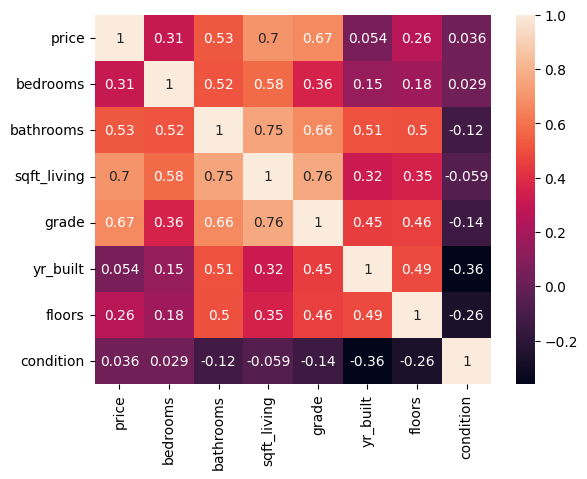

In [5]:
correlation = housing_df[['price', 'bedrooms','bathrooms','sqft_living','grade','yr_built','floors','condition']].corr()

sns.heatmap(correlation, annot = True)

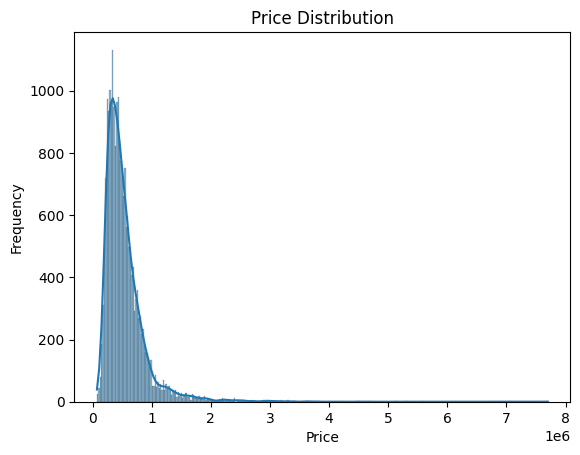

In [6]:
sns.histplot(housing_df['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

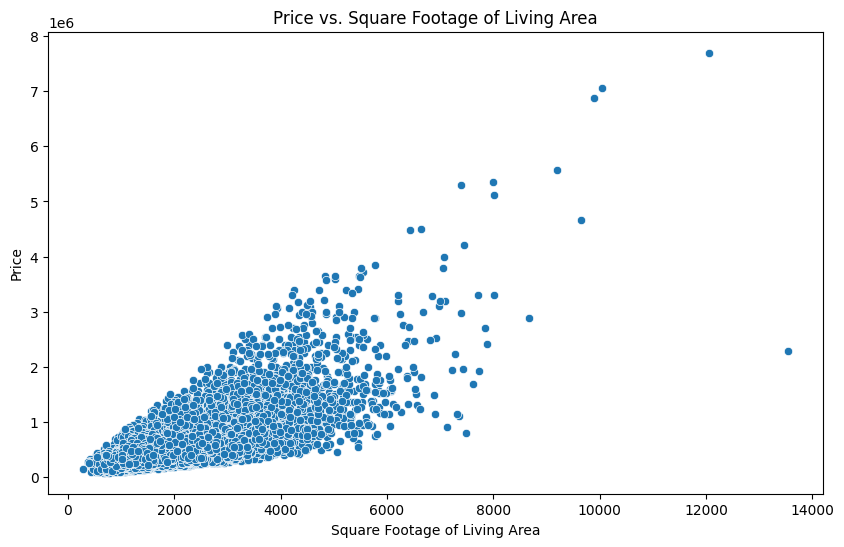

In [7]:
# Relationship between living area and price

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=housing_df)
plt.title('Price vs. Square Footage of Living Area')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.show()

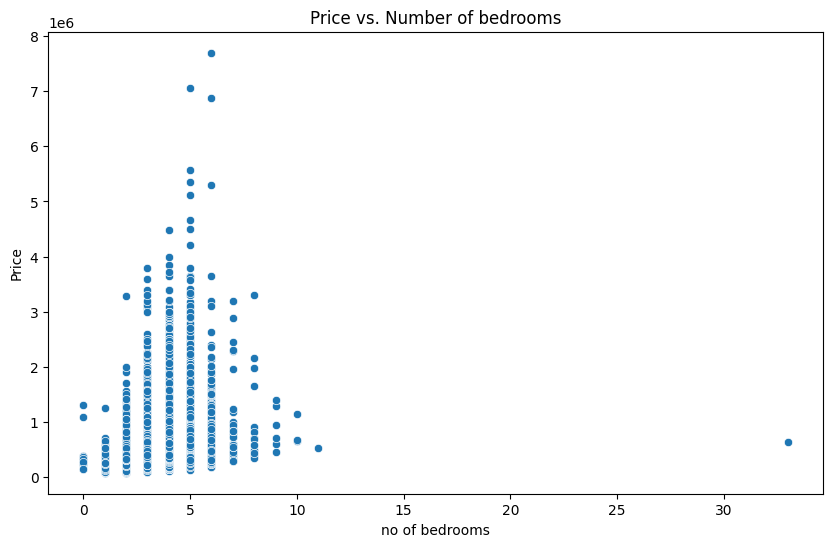

In [8]:
# Relationship between number of bedrooms and price

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=housing_df)
plt.title('Price vs. Number of bedrooms')
plt.xlabel('no of bedrooms')
plt.ylabel('Price')
plt.show()

In [9]:
housing_df['Outcome'] = np.where(housing_df['price'] > 550000, 1,0)

# Models

In [10]:
X = housing_df.drop(['Outcome','price'], axis=1)
y = housing_df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

c:\users\darryl\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2779
           1       0.78      0.61      0.69      1544

    accuracy                           0.80      4323
   macro avg       0.79      0.76      0.77      4323
weighted avg       0.80      0.80      0.79      4323



In [12]:
knn_model = KNeighborsClassifier(n_neighbors = 17)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [13]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      2779
           1       0.77      0.60      0.67      1544

    accuracy                           0.79      4323
   macro avg       0.79      0.75      0.76      4323
weighted avg       0.79      0.79      0.79      4323



In [14]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 32)
rf_model = rf_model.fit(X_train,y_train)
rf_model.score(X_test, y_test)

0.8748554244737451

In [15]:
prediction = rf_model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2779
           1       0.85      0.78      0.82      1544

    accuracy                           0.87      4323
   macro avg       0.87      0.85      0.86      4323
weighted avg       0.87      0.87      0.87      4323

